<a href="https://colab.research.google.com/github/jysonganan/methylDeConv/blob/master/heatmap_tSNE_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

# Figure 4
### Heatmap of extended reference library (only adding epithelial cells) using glmnetpreselect probes

In [65]:
dat = pd.read_csv("/content/drive/My Drive/dat_EPIC_extend_glmnetpreselect.csv")

In [66]:
dat.shape

(1049, 48)

In [67]:
dat.head()

,Unnamed: 0,201868500150_R01C01,201868500150_R03C01,201868500150_R05C01,201868500150_R07C01,201868500150_R08C01,201868590193_R02C01,201868590193_R03C01,201868590193_R06C01,201868590206_R02C01,...,GSM3455823,GSM3455824,GSM3455826,GSM3455827,GSM3455828,GSM3455829,GSM3455852,GSM3455863,GSM3455864,GSM3455865
0,NaN,Neu,NK,Neu,Bcell,NK,NK,CD4T,Bcell,Neu,...,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial,Epithelial
1,cg25131632,0.971745435320911,0.966122235502085,0.960595100743297,0.0313034376414144,0.96669614986778,0.96679927769015,0.963756884916829,0.0252056434879484,0.96973112971315,...,0.96440954086286,0.969930041832842,0.935276487621967,0.928824268721781,0.957693658936428,0.891540565123025,0.977732073923892,0.965148300326241,0.966029321347495,0.961912528463037
2,cg11773391,0.95244670025673,0.949608095557457,0.951697982314786,0.0334035774698886,0.943788695240929,0.951393917257549,0.962053654912066,0.0192971834337917,0.952157193786399,...,0.931379950582316,0.925669937327391,0.896209910887042,0.904244312924724,0.925744313296207,0.932751839563127,0.966479755341603,0.941146814342806,0.943644671372373,0.921525785139348
3,cg08017518,0.949422599611754,0.926636883549485,0.956192002797565,0.0313463749573558,0.931967966349003,0.948823229314843,0.960623667645404,0.0258060553138929,0.94652145744077,...,0.953818367036682,0.946649152169948,0.934571130973965,0.93155487242825,0.942738231859967,0.944532847166273,0.964774351461058,0.950107468778342,0.94722012936827,0.827617555731626
4,cg04985318,0.954575768124791,0.955750855770838,0.956286140304365,0.0668262988764879,0.955062416133669,0.957607104683408,0.956268642615504,0.0352549318144509,0.948142796592923,...,0.942669314305453,0.948059996425799,0.940310667958355,0.945872659043891,0.953015832429925,0.9443578059985,0.96705737006767,0.952877605078159,0.948260754781576,0.950714221188938


In [68]:
type(dat.iloc[0,:])

pandas.core.series.Series

In [69]:
dat = dat.iloc[:,1:]
y = dat.iloc[0,:].array
X = dat.iloc[1:,]

In [70]:
X = X.T

In [71]:
X.shape

(47, 1048)

In [72]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

tsne_obj= tsne.fit_transform(X)

tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'cell type':y})

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


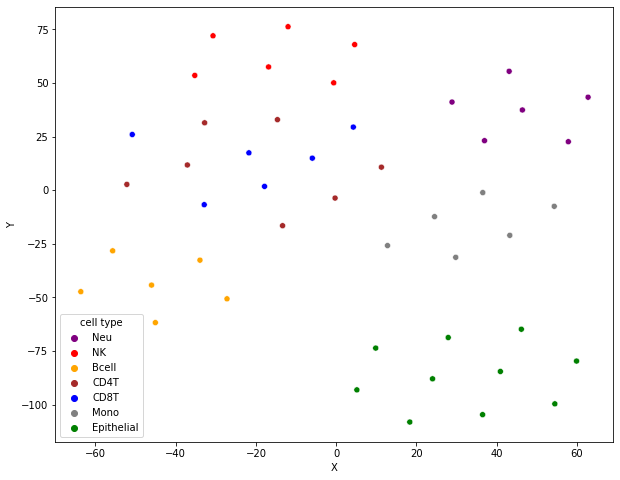

In [73]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="X", y="Y",
              hue="cell type",
              palette=['purple','red','orange','brown','blue',
                       'grey','green'],
              legend='full',
              data=tsne_df)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1152x720 with 0 Axes>

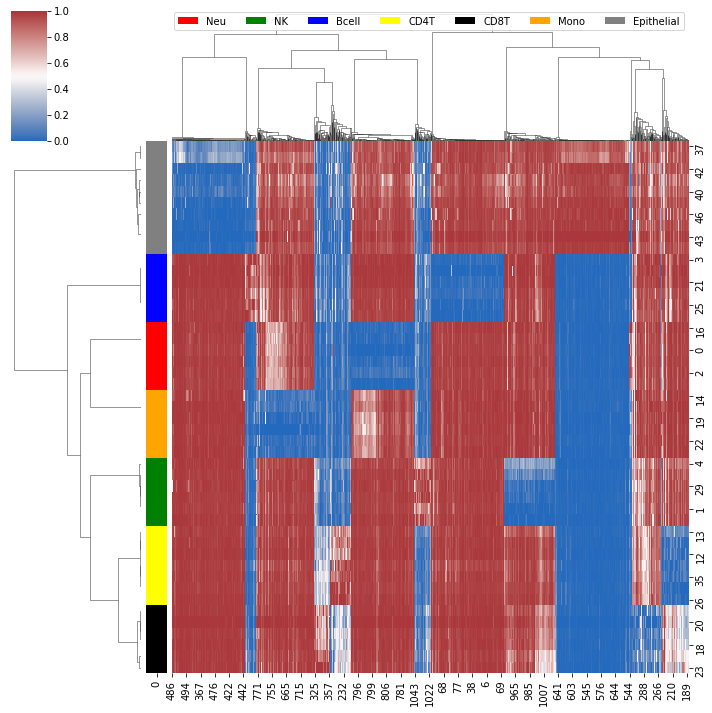

In [74]:
y = dat.iloc[0,:]

X.index = range(47)
y.index = range(47)
X = X.astype(float)

my_palette = dict(zip(y.unique(), ["red","green","blue","yellow","black","orange","grey"]))
row_colors = y.map(my_palette)

plt.figure(figsize=(16,10))
g = sns.clustermap(X, metric="correlation", method="average", cmap="vlag", standard_scale=1, row_colors = row_colors)
# Draw the legend bar for the classes                 
for label in y.unique():
    g.ax_col_dendrogram.bar(0, 0, color=my_palette[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="best", ncol=7)

# # Adjust the postion of the main colorbar for the heatmap
# g.cax.set_position([.97, .2, .03, .45])

plt.savefig('/content/drive/My Drive/Figure4.pdf') 

# Figure S4 
### tSNE of reference profiles (only adding epithelial cells) using all probes

In [60]:
dat = pd.read_csv("/content/drive/My Drive/dat_EPIC_extend.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [61]:
dat = dat.iloc[:,1:]
y = dat.iloc[0,:].array
X = dat.iloc[1:,]

In [62]:
X = X.T

In [63]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

tsne_obj= tsne.fit_transform(X)

tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'cell type':y})

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


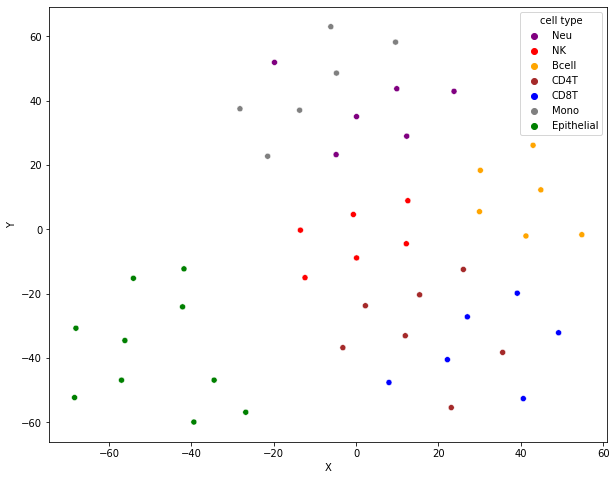

In [64]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="X", y="Y",
              hue="cell type",
              palette=['purple','red','orange','brown','blue',
                       'grey','green'],
              legend='full',
              data=tsne_df)


plt.savefig('/content/drive/My Drive/FigureS4.pdf') 

# Figure S5
### tSNE of reference profiles (only adding epithelial cells) using oneVsAllttest probes

In [54]:
dat = pd.read_csv("/content/drive/My Drive/dat_EPIC_extend_oneVsAllttest.csv")

In [55]:
dat = dat.iloc[:,1:]
y = dat.iloc[0,:].array
X = dat.iloc[1:,]

In [56]:
X = X.T

In [57]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

tsne_obj= tsne.fit_transform(X)

tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'cell type':y})

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


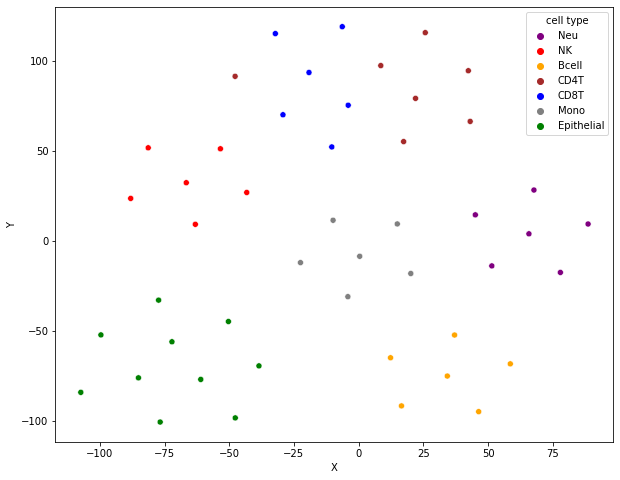

In [58]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="X", y="Y",
              hue="cell type",
              palette=['purple','red','orange','brown','blue',
                       'grey','green'],
              legend='full',
              data=tsne_df)


plt.savefig('/content/drive/My Drive/FigureS5.pdf') 

# Figure S6
### Heatmap of reference profiles (only adding epithelial) using oneVsAlltest probes

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1152x720 with 0 Axes>

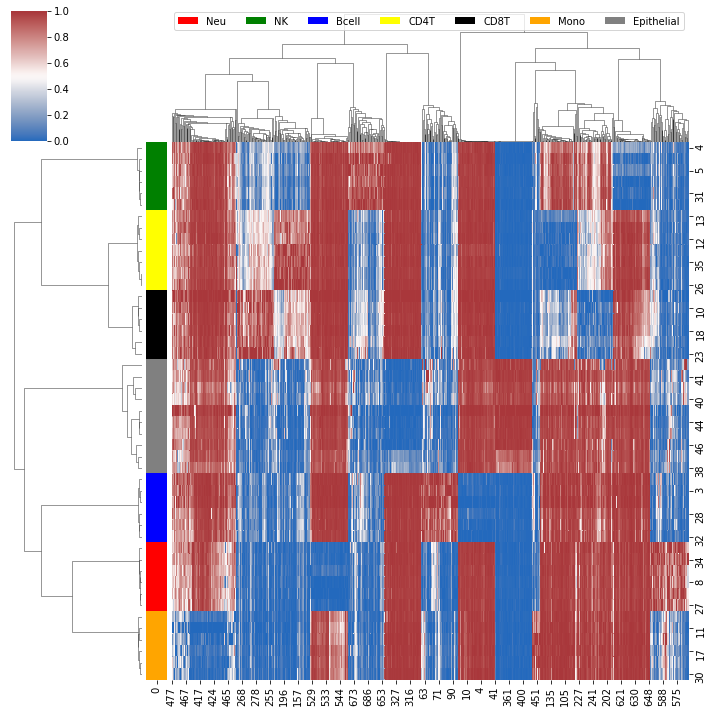

In [59]:
y = dat.iloc[0,:]

X.index = range(47)
y.index = range(47)
X = X.astype(float)

my_palette = dict(zip(y.unique(), ["red","green","blue","yellow","black","orange","grey"]))
row_colors = y.map(my_palette)

plt.figure(figsize=(16,10))
g = sns.clustermap(X, metric="correlation", method="average", cmap="vlag", standard_scale=1, row_colors = row_colors)
# Draw the legend bar for the classes                 
for label in y.unique():
    g.ax_col_dendrogram.bar(0, 0, color=my_palette[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="best", ncol=7)

# # Adjust the postion of the main colorbar for the heatmap
# g.cax.set_position([.97, .2, .03, .45])


plt.savefig('/content/drive/My Drive/FigureS6.pdf') 

# Figure S7
### Dendrogram of reference profiles (only adding epithelial) using top 5000 most Variable probes

In [50]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [51]:
dat = pd.read_csv("/content/drive/My Drive/dat_EPIC_extend_mostVar.csv")

In [52]:
dat = dat.iloc[:,1:]

y = dat.iloc[0,:].array
X = dat.iloc[1:,:]
X = X.T

X.index = range(47)

X = X.astype(float)

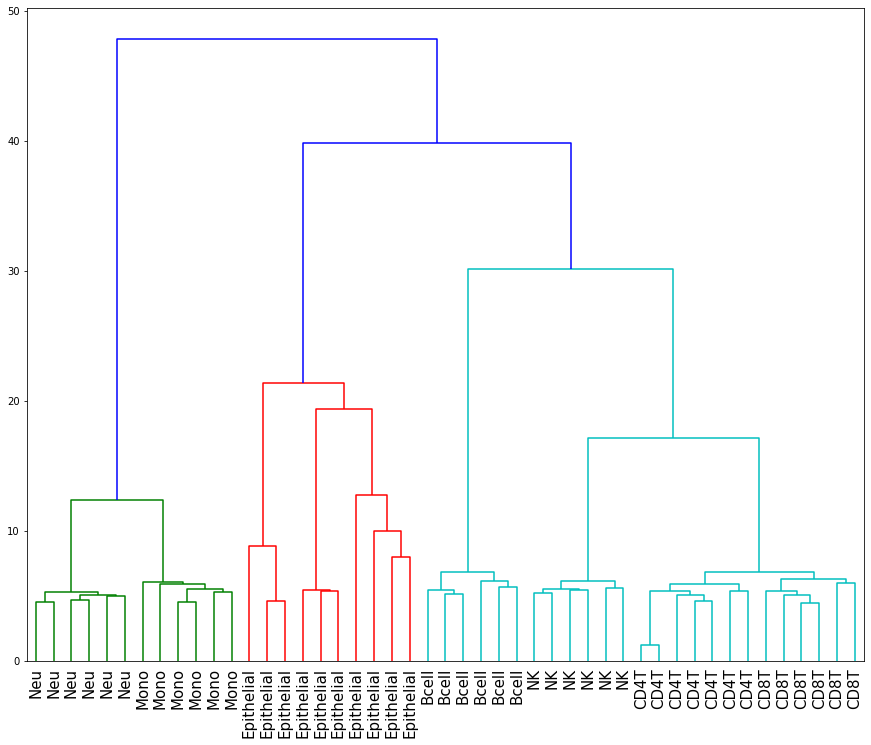

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = y

plt.figure(figsize=(15,12))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)


# my_palette = dict(zip(y.unique(), ["red","green","blue","yellow","black","orange","purple","grey"]))
# row_colors = y.map(my_palette)


# # Create a color palette with 3 color for the 3 cyl possibilities
# my_palette = plt.cm.get_cmap("Accent_r", 8)
 
# # transforme the 'cyl' column in a categorical variable. It will allow to put one color on each level.

# my_color=pd.Categorical(y).codes
 
# # Apply the right color to each label
# ax = plt.gca()
# xlbls = ax.get_xmajorticklabels()
# num=-1
# for lbl in xlbls:
#   num+=1
#   val=my_color[num]
#   lbl.set_color(my_palette(val))

ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize= 15)

plt.savefig('/content/drive/My Drive/FigureS7.pdf')  

plt.show()


In [49]:
plt.savefig('/content/drive/My Drive/FigureS7.pdf')  

<Figure size 432x288 with 0 Axes>

# Figure S2
### tSNE of reference profiles (adding cfDNA and epithelial cells) using all probes.

In [75]:
dat = pd.read_csv("/content/drive/My Drive/dat_EPIC_extend_both.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [76]:
dat = dat.iloc[:,1:]
y = dat.iloc[0,:].array
X = dat.iloc[1:,]

In [77]:
X = X.T

In [78]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

tsne_obj= tsne.fit_transform(X)

tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'cell type':y})

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


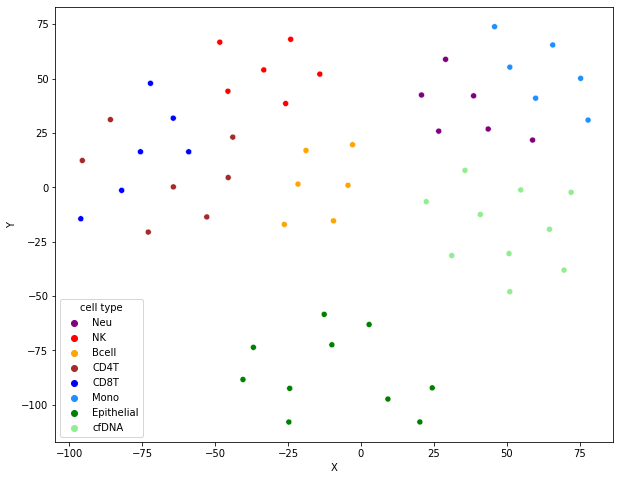

In [80]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="X", y="Y",
              hue="cell type",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen'],
              legend='full',
              data=tsne_df)


plt.savefig('/content/drive/My Drive/FigureS2.pdf') 

# Figure S3
### tSNE of reference profiles (adding cfDNA and epithelial cells) using oneVsAllttest probes

In [82]:
dat = pd.read_csv("/content/drive/My Drive/dat_EPIC_extend_both_oneVsAllttest.csv")

In [83]:
dat = dat.iloc[:,1:]
y = dat.iloc[0,:].array
X = dat.iloc[1:,]

In [84]:
X = X.T

In [85]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

tsne_obj= tsne.fit_transform(X)

tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'cell type':y})

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


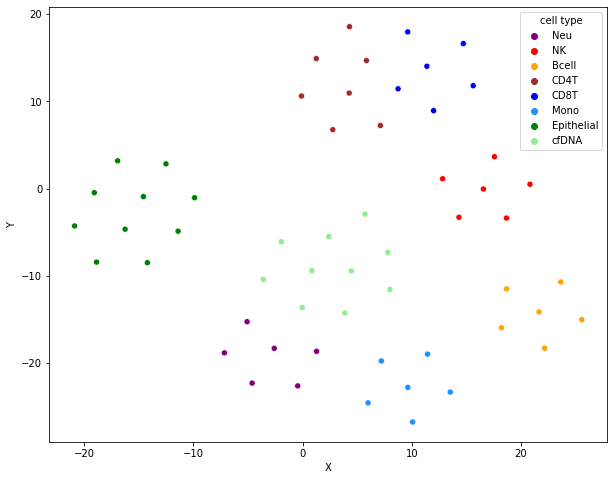

In [86]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="X", y="Y",
              hue="cell type",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen'],
              legend='full',
              data=tsne_df)


plt.savefig('/content/drive/My Drive/FigureS3.pdf') 

# Additional figure
### heatmap of extended reference library (adding epithelial cells and cfDNAs) using oneVsAllttest probes (1048 probes)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1152x720 with 0 Axes>

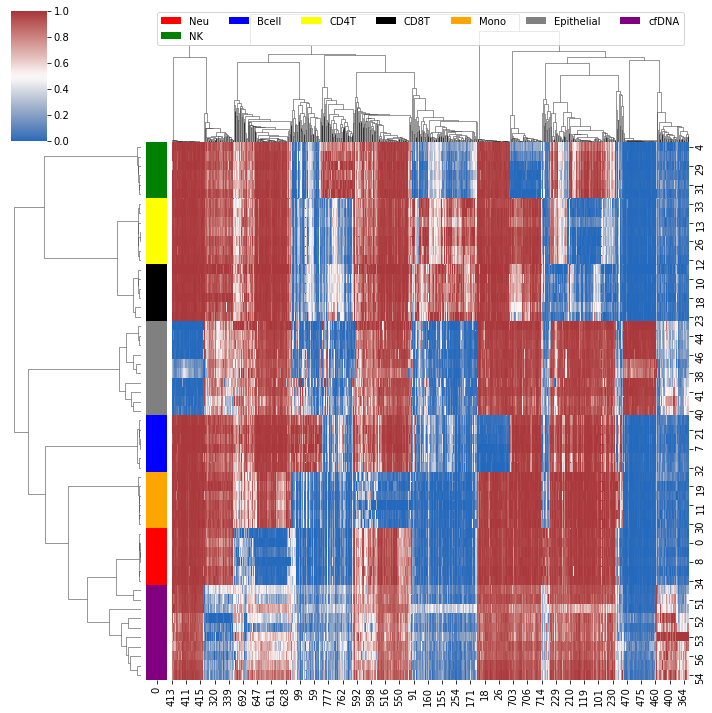

In [89]:
y = dat.iloc[0,:]

X.index = range(57)
y.index = range(57)
X = X.astype(float)

my_palette = dict(zip(y.unique(), ["red","green","blue","yellow","black","orange","grey", "purple"]))
row_colors = y.map(my_palette)

plt.figure(figsize=(16,10))
g = sns.clustermap(X, metric="correlation", method="average", cmap="vlag", standard_scale=1, row_colors = row_colors)
# Draw the legend bar for the classes                 
for label in y.unique():
    g.ax_col_dendrogram.bar(0, 0, color=my_palette[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="best", ncol=7)

# # Adjust the postion of the main colorbar for the heatmap
# g.cax.set_position([.97, .2, .03, .45])


plt.savefig('/content/drive/My Drive/AdditionalFigure.pdf')